# Wirkung von Fensterfunktionen
Wir betrachten Cosinus-Signale mit Frequenzen von 1 Hz bis 1,25 Hz im Zeitbereich und die jeweilige DFT. Die Abtastrate $f_A$ ist 16 Hz, die Signallänge beträgt 2 Sekunden. Die Fensterfunktion kann verändert werden. Dargestellt werden die jeweilige Fensterfunktion sowie die Signale im Zeit- und Frequenzbereich.  
Durch die Multiplikation mit einem nicht-rechteckförmigen Fenster geht Signalenergie verloren, so dass die Maximalwerte im resultierenden Spektrum deutlich kleiner sind (rote Spektralwerte). Üblicherweise wird daher ein fensterabhängiger Korrekturfaktor eingerechnet wird (schwarze Spektralwerte). 

Dropdown(description='Fenster:', index=1, options=('Rechteck', 'Hamming', 'Hanning', 'Blackman'), value='Hammi…

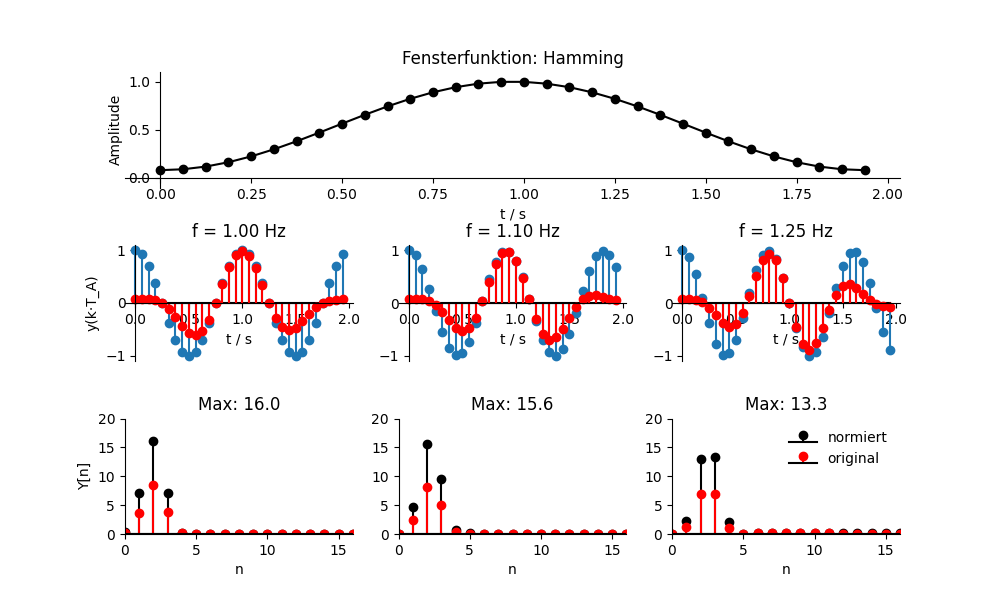

In [14]:
"""
Fensterfunktionen-Demoscript 
(c) Benno Dömer | HS Pforzheim 2025 

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt

%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

# Parameters
fa = 16                      # sampling frequency in Hz
fsig = np.array([1, 1.1, 1.25])  # signal frequencies in Hz
tl = 2                       # signal length in seconds
n_freq = len(fsig)           # number of frequencies
t = np.arange(0, tl, 1/fa)     # time instants
N = int(fa * tl)             # total number of samples

fig = plt.figure(figsize=(10, 6), dpi=100,num=' ')
spec = fig.add_gridspec(ncols=3, nrows=3, hspace=.5)#, width_ratios=[2,1])

def plotdata(wd):
    if wd == "Hamming": # Hamming
        fwd = np.hamming(N); # Hammingfenster
    elif wd == "Hanning": # Hanning
        fwd = np.hanning(N); # Hanningfenster
    elif wd == "Blackman": # Blackman
        fwd = np.blackman(N); # Blackmanfenster
    else: # Default: Rechteck
        fwd = np.ones(N); # Rechteckfenster
    
    # clear figure
    fig.clf()
    ax = fig.add_subplot(spec[0,0:3])
    ax.plot(t, fwd, 'o-k') # plot window function
    ax.set_xlabel('t / s')
    ax.set_ylabel('Amplitude')
    ax.set_title('Fensterfunktion: {}'.format(wd))
    ax.set_ylim([-0.1, 1.1])
    myplotstyle(ax)  # apply custom plot style
    # Signal erzeugen

    for i in range(n_freq):
        # Generate cosine signal and apply the window
        yor = np.cos(2 * np.pi * t * fsig[i])
        y = yor * fwd  # element-wise multiplication
        ax = fig.add_subplot(spec[1,i])
    
        # Plot time-domain signals (original and windowed)
        ax.stem(t, yor, linefmt='-', markerfmt='o', basefmt="k-", label='Cosinus')
        ax.stem(t, y, linefmt='r-', markerfmt='ro', basefmt=" ", label='Windowed')
        ax.set_xlabel('t / s')
        if i == 0:
            ax.set_ylabel('y(k·T_A)')
        ax.set_title(f'f = {fsig[i]:.2f} Hz')
        myplotstyle(ax)

        # Compute and plot FFT (magnitude)
        ax = fig.add_subplot(spec[2,i])
        Y = np.abs(np.fft.fft(y))
        av = np.sum(fwd)/N
        ax.stem(np.arange(N), Y/av, linefmt='-k', markerfmt='ko', basefmt="k-")
        ax.stem(np.arange(N), Y, linefmt='-r', markerfmt='ro', basefmt="k-")
        #ax.set_ylim([0, (N/2)*5/4])
        
        ax.set_xlabel('n')
        ax.set_title(f'Max: {np.max(Y)/av:.1f}')
        if i == 0:
            ax.set_ylabel('Y[n]')
        ax.set_xlim([0, N/2])
        ax.set_ylim([0, (N/2)*5/4])
        myplotstyle(ax)
    ax.legend(['normiert','original'],edgecolor='none')
    fig.canvas.draw()

    ## Interaktion: 
# Definition von Controls: 
sigcombo = widgets.Dropdown(options=['Rechteck','Hamming','Hanning','Blackman'],
                                    value='Hamming',description='Fenster:')



#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, {'wd': sigcombo}) 
#Anzeigen
display(sigcombo) #, sigtxt, ekcb, out)
plt.show()